# Effects of temperature on microbial carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

## Introduction

## The Model
Adapted from [Emma Cavan](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Consumer_Resource_Model.ipynb)'s model of the impact of chemical pollution on microbial communities. Originated from [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) with [Tom Clegg](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) making the first version.  

Further adapted to monitor microbial carbon use efficiency over time with different temperature. 

### Equations
#### General Model
Growth rate (biomass) of species i on resource j: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_j(1-\sum_{k=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

Concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}\Bigl)
\end{equation}

Type 2: Monod equation
\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}




| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? (Dependant on temperature, species & resources?) |
| $U_{ij}$ | Uptake of resource j by species i | - | Temperature & size dependant |
| $R_i$ | Respiration of species i | - | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | $l_j$ = 0.4|
| $\rho_j$ | Supply of resource j | g/mL | 1 |

###### Description: 
Generally speaking, the growth rate of speices i is calculated by the actual uptake of all resources by that species minus carbon loss through respiration:

\begin{equation}
\frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i
\end{equation}


The actual uptake by species i is calculated as follow, where $U_{ij}$ is the per biomass uptake rate of resource j by species i; $s_j$ is the Monod equation considering the concentration of resources (resource avalibility):

\begin{equation}
U_i = \sum_{j=1}^{M}U_{ij}s_j
\end{equation}

$l_{jk}$ represents the percentage of resources consumed but was transformed and released into the environment as another resource. 

In the resource model, the resource dynamic of the system is calculated by the external input of each resource which is constant through time as $\rho_j$, minus the uptake of $U_j$ by all species, and plus the internal supply by the conversion of other resources: 

\begin{equation}
\frac{dS_j}{dt} = \rho_j - U_j + L_j
\end{equation}


For each species i, the total uptake rate of resource j (not considering the release of k) is $C_iU_{ij}s_j$. 

The release of converted j from k is calculated by the uptake and leakage of resource k.  

\begin{equation}\label{eq:}
L_{ij} = \sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}
\end{equation}



#### Size and Temperature Dependency

With modified Schoolfield ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)): 
\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_U}{E_{D_U}-Ea_U}e^{\frac{E_{D_U}}{k}\cdot(\frac{1}{T_{pk_U}}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_R}{E_{D_R}-Ea_R}e^{\frac{E_{D_R}}{k}\cdot(\frac{1}{T_{pk_R}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | Experimental observation |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | Experimental observation |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |
| $E_D$ | High temperature deactivation energy | eV | 3.5|
| $T_{pk_U}$ | Temperature of peak uptake rate | K | 273.15 + 25 |
| $T_{pk_R}$ | Temperature of peak respiration rate | K | $T_{pk_U}$ + 2|

#### Carbon Use Efficiency
##### Literature notes

| Mathmetical approach | Notes | ref |
|---|---|---|
| $\frac{U-R}{U}$| Uptake and Respiration | [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)|
|$\frac{GR}{GR+RR}$| Growth rate and respiration rate |[1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[6](https://academic.oup.com/femsec/article/73/3/430/528718) |
|  |
| $\frac{\Delta C_S-R_{cum}}{\Delta C_S}$ | Decrease in substrate concentration and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[8](https://www.sciencedirect.com/science/article/pii/S0038071711001787)|
| $\frac{\Delta C_B}{\Delta C_B+R_{cum}}$ | Increase in biomass and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[2](https://www.sciencedirect.com/science/article/pii/S0038071716300165),[3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316),[5](https://onlinelibrary.wiley.com/doi/abs/10.1111/gcb.12036),[7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)|


Microbial growth: rates of biomass increase, protein synthesis, DNA replication, or consumption of $^{13}C$‐labeled substrates. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

Respiration: rates of total $CO_2$ efflux, $^{13}CO_2$ efflux from labeled substrates, oxygen consumption, or respiratory electron transport. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

$ U = G + R $ [3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316); metabolic tracer [9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)


CUE estimation under steady state conditions, the efficiency of microbial metabolism(maintenance): $\frac{R}{U}$ [10](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0093282)

Population, community and ecosystem-scale CUE ([Fig.2](https://link.springer.com/article/10.1007/s10533-016-0191-y/figures/2)) [11](https://link.springer.com/article/10.1007/s10533-016-0191-y)

##### Calculation


Percentage of carbon assimilated, calculated by growth rate over total actual uptake at each time point:

\begin{equation}
CUE_i = \frac{dC_i/dt}{C_i\sum \limits _{j=1}^{M}U_{ij}s_j}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 
- CUE is calculated at each time step for each consumer. 

### Example uptake and leakage matrix at 25 C (10 consumers, 5 resources)

- Uptake: assuming each consumer has one single temperature response curve which controls the total uptake of all resources. The resources uptake by each consumer are averagely and randomly distributed, which sum up to the total value calculated by the size and temperature dependency function.
- leakage(the conversion of resource j to k): the total conversion effecient of each resource is 0.4, which is averagely distributed among all resources it converted to. Assuming no resources can be converted back, so the lower diagnol is set to be 0. 

In [1]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
np.random.seed(0)
pk_U = np.random.normal(32, 5, size = N)
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk_U # Peak above Tref, Kelvin
T = 273.15 + 21 # Model temperature
Ea_U = np.round(np.random.normal(1.5, 0.01, N),3)[0:N] # Ea for uptake
Ea_R = Ea_U - 0.6 # Ea for respiration, which should always be lower than Ea_U so 'peaks' later
B_U = (10**(2.84 + (-4.96 * Ea_U))) + 4 # B0 for uptake - ** NB The '+4' term is added so B_U>> B_R, otherwise often the both consumers can die and the resources are consumed
B_R = (10**(1.29 + (-1.25 * Ea_R))) # B0 for respiration

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
np.random.seed(0)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

[378.92681476 394.53308104 386.85542702 378.95591926 382.39818658
 364.75929624 395.13590871 372.86123871 378.81316732 366.88308421]
[[ 69.91856034 110.33507159  81.10629574  69.1565953   48.4102918 ]
 [ 53.64108898  29.73674341 114.88821752 171.2795909   24.98744023]
 [104.05313875  49.91924038  55.67329809 172.3227517    4.8869981 ]
 [  6.34433705   1.4215154  124.39991542 104.79480962 141.99534177]
 [190.66957398  79.59757739  30.69030115  75.19911225   6.24162181]
 [ 69.71903405  10.56125637 197.56207003  50.36126816  36.55566763]
 [ 37.1998911  180.17070527  73.73657095 101.73237329   2.2963681 ]
 [ 52.01897321  51.24066156  51.91979451 155.71994706  61.96186237]
 [ 49.97303892  64.44430678 134.16534369   6.96736533 123.2631126 ]
 [175.94022457  37.41973422  21.86642754  60.03494284  71.62175504]]


In [2]:
import numpy as np

M = 5
lf = 0.4
l_raw = np.array([[np.random.normal(1/(i-1),0.005)* lf if i-1>0 else np.random.normal(lf, 0.005) for i in range(M,0,-1)] for i in range(1,M+1)])
fix = [[1 if j>i else 0 for j in range(M)] for i in range(M)]
fix[M-1][0] = 1
l = np.transpose(l_raw) * fix
print(l)
print(np.sum(l, axis = 1))

[[0.         0.1034527  0.1008621  0.10051629 0.10404739]
 [0.         0.         0.13021311 0.13267483 0.1319257 ]
 [0.         0.         0.         0.19865549 0.19976768]
 [0.         0.         0.         0.         0.3981897 ]
 [0.39994259 0.         0.         0.         0.        ]]
[0.40887848 0.39481364 0.39842317 0.3981897  0.39994259]


### Example of Modified Sharpe-Schoolfield Temperature dependency

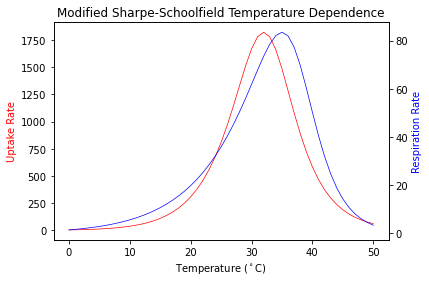

In [11]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.0000862 # Boltzman constant
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
T = Tref + np.linspace(0,50,51) # Temperatures
T_pk_U = Tref + 32
T_pk_R = T_pk_U + 3
Ea_U = 1.5 # Ea for uptake
Ea_R = Ea_U - 0.6 # Ea for respiration, which should always be lower than Ea_U so 'peaks' later
B_U = (10**(2.84 + (-4.96 * Ea_U))) + 4 # B0 for uptake - ** NB The '+4' term is added so B_U>> B_R, otherwise often the both consumers can die and the resources are consumed
B_R = (10**(1.29 + (-1.25 * Ea_R))) # B0 for respiration
Ea_D = 3.5 # Deactivation energy


U_Sharpe = B_U * np.exp((-Ea_U/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U/(Ea_D - Ea_U)) * np.exp(Ea_D/k * (1/T_pk_U - 1/T))) 
R_Sharpe = B_R * np.exp((-Ea_R/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R/(Ea_D - Ea_R)) * np.exp(Ea_D/k * (1/T_pk_R - 1/T)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(T - Tref, U_Sharpe, 'r-', linewidth=0.7)
ax2.plot(T - Tref, R_Sharpe, 'b-', linewidth=0.7)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake Rate', color = 'r')
ax2.set_ylabel('Respiration Rate', color = 'b')
plt.title('Modified Sharpe-Schoolfield Temperature Dependence')
plt.show()


### Type I


#### 1 consumer, 1 resource, 25C

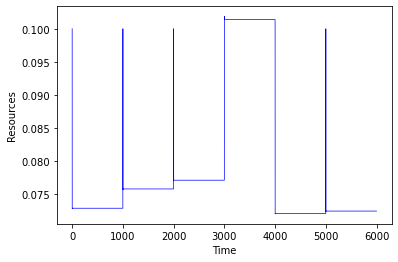

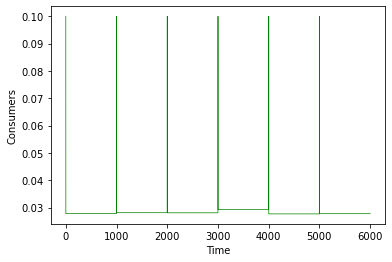

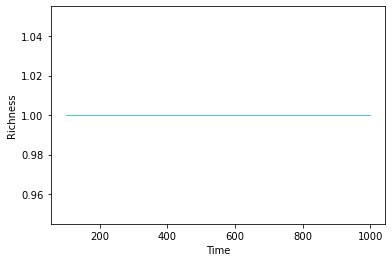

In [1]:
from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 10 # immigration times inside one assembly
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

#### 2 consumers, 1 resources, 25C

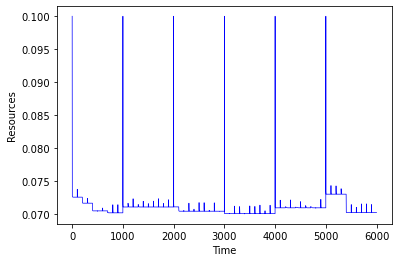

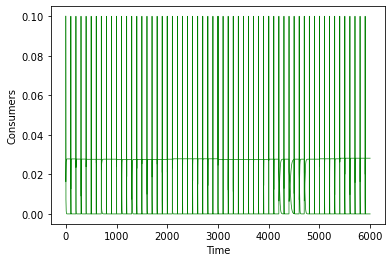

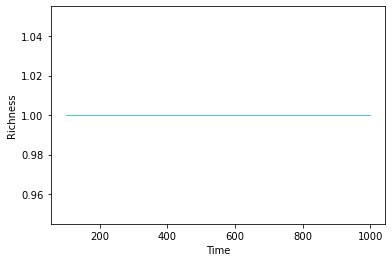

In [4]:
from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 10 # immigration times inside one assembly
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

#### 1 assembly, 1 immigration

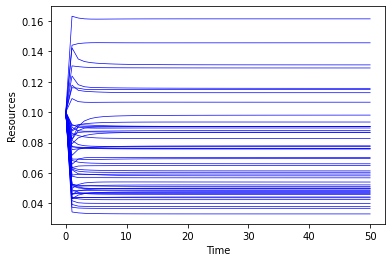

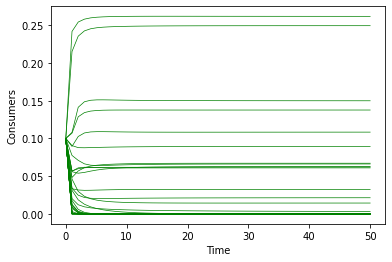

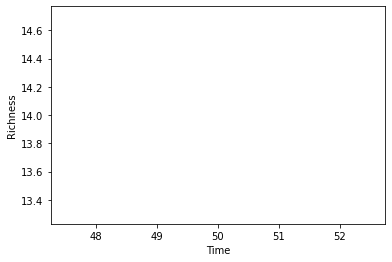

0.014121540387471517


In [5]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### 2 assembly, 1 immigration

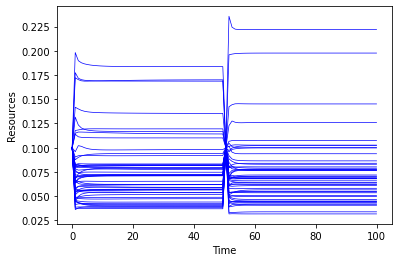

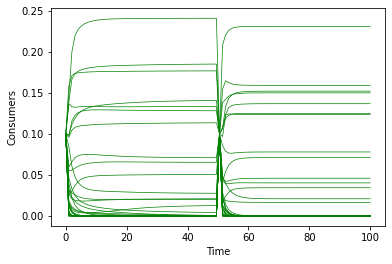

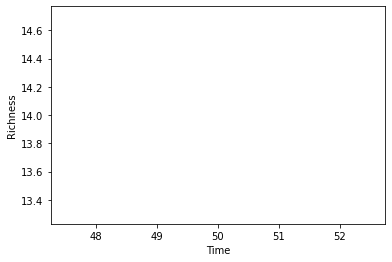

0.01650890111923218


In [6]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 2 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### 1 assembly, 2 immigration

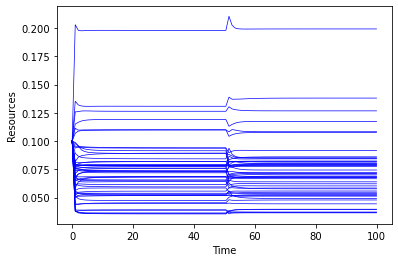

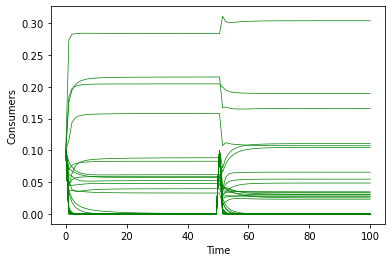

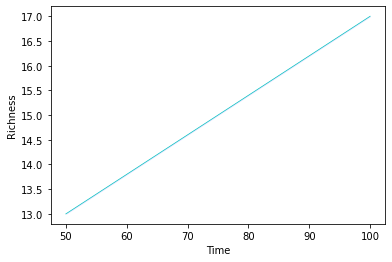

0.014055506388346354


In [7]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 2 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### To show the number of resources determines the final richness


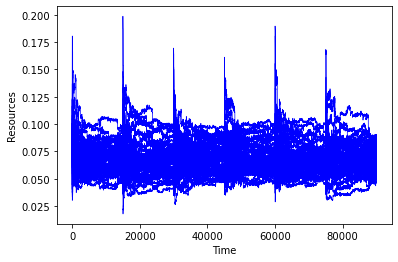

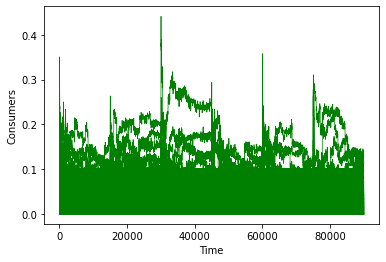

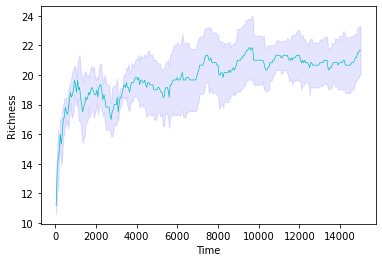

5.035735841592153


In [8]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

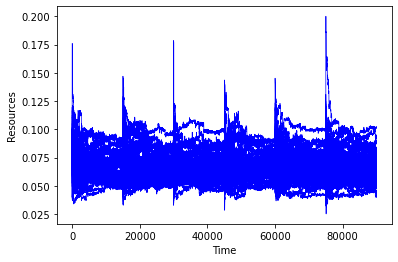

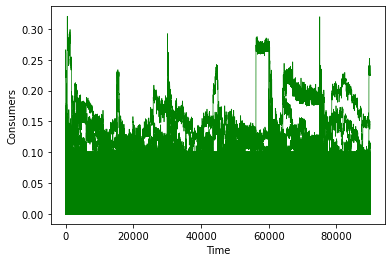

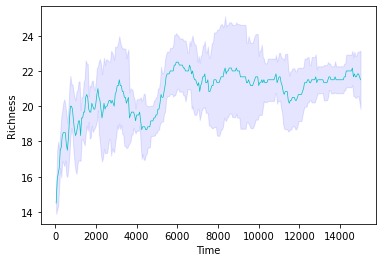

8.311708756287892


In [10]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### Richness with Temperature

##### Literature notes
###### A communal catalogue reveals Earth’s multiscale microbial diversity (2017) [1](https://www.nature.com/articles/nature24621): 

Global data. Figure 2b demonstrates a trend of decreasing richness with increasing temperature after 10 &deg;C, however the effects of temperature and pH were not differentiated, given the original data, after subsetting pH values to 6.5-8.0, there are no richness measures after 25 &deg;C. 

###### Temperature mediates continental-scale diversity of microbes in forest soils (2016) [2](https://www.nature.com/articles/ncomms12083?origin=ppub#Abs1): 

The article discusses annual mean temperature in forest soil North America (-10 &deg;C - 20 &deg;C), which is closer to current study. Figure 2 shows an increase of richness with temperature (275 - 300K). 

###### Impact of Warming on Greenhouse Gas Production and Microbial Diversity in Anoxic Peat From a Sphagnum-Dominated Bog (Grand Rapids, Minnesota, United States) (2019) [3](https://www.frontiersin.org/articles/10.3389/fmicb.2019.00870/full):

Anoxic Peat ("an ombrotrophic, nutrient-deficient, acidic, Sphagnum-dominated peat bog (surface pH < 4.0)") methanogenic layer, ex-situ lab experiment, 4 weeks for each temperature. Decreasing richness with increasing temperature (0 - 30 &deg;C, Figure 4). 

##### 35+50,  p = 1, l = 0.1 - 0.9

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


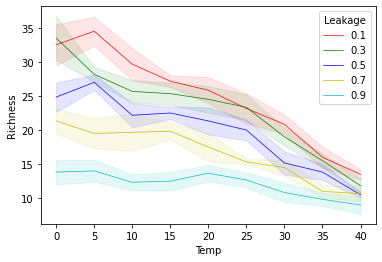

288.529659418265


In [11]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(5):
    lf = 0.1+i*0.2 # Leakage
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b', 'y', 'c']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = np.round(lf,1))
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "Leakage")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)

##### 35+50, l = 0.4, p = 1 - 100

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


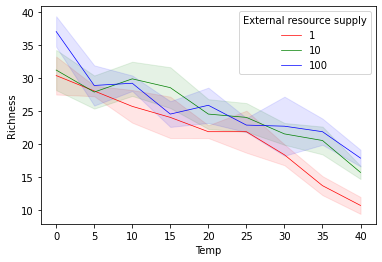

150.11419424215953


In [18]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage


# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(3):
    p_value = 10**i # External input resource concentration
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = p_value)
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "External resource supply")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### Ea_diff = 0.3, 0.6, 0.9

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


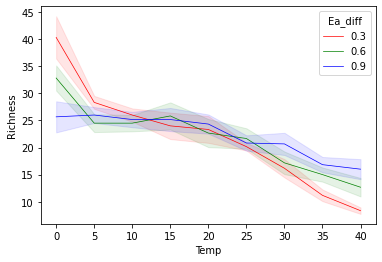

118.62104683319727


In [19]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(3):
    Ea_diff = 0.3*(i+1)
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = np.round(Ea_diff,1))
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "Ea_diff")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### Leakage with respiration Ea, at 25 degrees

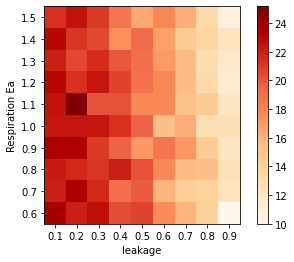

381.7515827258428


In [14]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly number, i.e. how many times the system can assemble
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant

rich_mean = np.empty((0,9))
for i in range(10):
    Ea_diff = 0.1*i
    rich_clct = []
    for j in range(9):
        lf = (j + 1)*0.1 # Leakage
        rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)[1]
        rich_clct = np.append(rich_clct, np.mean(rich_series[:,tv-1]))
    rich_mean = np.append(rich_mean, [rich_clct], axis = 0)


Xlabel = np.round(np.arange(0.1,1,0.1), 1)
Ylabel = np.round(1.5 - np.arange(0,1,0.1), 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("leakage")
plt.ylabel("Respiration Ea")
im = plt.imshow(rich_mean, cmap = 'OrRd')
plt.colorbar(im)
plt.title( "" )
plt.show()

print((time.time() - start)/60)

##### Leakage with resource input, at 25 degrees

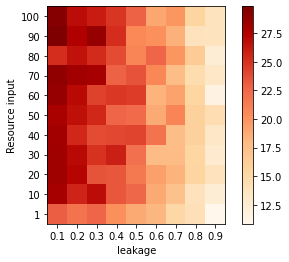

501.8163477261861


In [27]:
##### import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
Ea_diff = 0.6

# Assembly
ass = 6 # Assembly number, i.e. how many times the system can assemble
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant

rich_mean = np.empty((0,9))
for i in range(11):
    p_value = 1 if i==0 else 10*i
    rich_clct = []
    for j in range(9):
        lf = (j + 1)*0.1 # Leakage
        rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)[1]
        rich_clct = np.append(rich_clct, np.mean(rich_series[:,tv-1]))
    rich_mean = np.append(rich_mean, [rich_clct], axis = 0)


Xlabel = np.round(np.arange(0.1,1,0.1), 1)
Ylabel = np.concatenate((np.round(np.arange(100,0,-10), 1), [1]))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("leakage")
plt.ylabel("Resource input")
im = plt.imshow(np.flip(rich_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "" )
plt.show()

print((time.time() - start)/60)

#####  R to 1

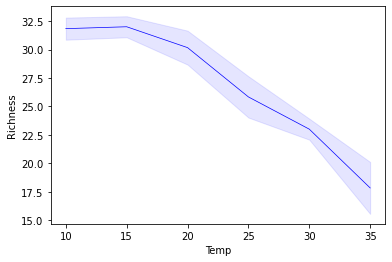

19.21840780178706


In [1]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 6 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(10, 10 + 5*T_c, 5)
# T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### 50+100, l = 0.4, p = 1

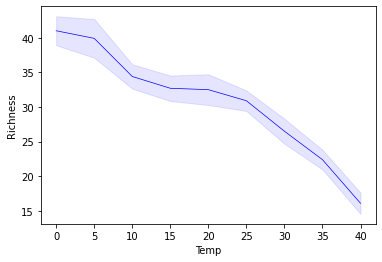

148.03232493400574


In [15]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 10 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


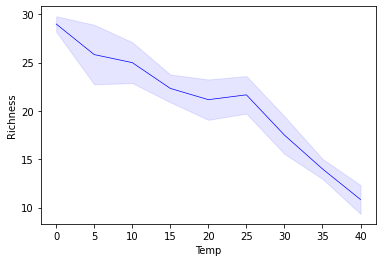

49.233915174007414


In [1]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


#### survival with temperature

/home/danica/Documents/CMEEProject/code/comp.py:50: RuntimeWarning: invalid value encountered in true_divide
  sur_rate = np.array(s_sur/s_total).reshape(tv,int(np.ceil(np.max(U_ac_total)/10)))
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid val

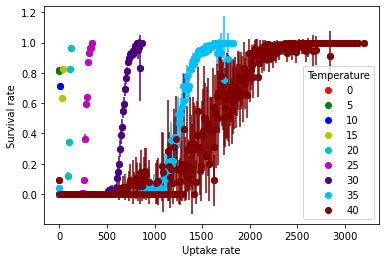

15.04181166489919


In [16]:
import time
start = time.time()

from comp import plot_comp
import numpy as np
import matplotlib.pylab as plt


######## Set up parameters ###########

N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4
p_value = 1 # External input resource concentration

# Assembly
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant


########## Running Model ###########
for i in range(9):
    sur_rate_filtered = plot_comp(t_fin, N, M, Tref+5*i, Tref, Ma, tv, Ea_D, lf, p_value, typ, K)

    sur_rate_mean = []
    sur_rate_ci = []
    for j in range(len(sur_rate_filtered)):
        sur_rate_mean.append(np.mean(sur_rate_filtered[j]))
        sur_rate_ci.append(1.96 * np.std(sur_rate_filtered[j],axis = 0)/(len(sur_rate_filtered[j])**0.5))
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'indigo', 'deepskyblue', 'maroon']
    plt.scatter(range(0,len(sur_rate_mean)*10,10),sur_rate_mean, c = colors[i], label = str(5*i))
    plt.errorbar(range(0,len(sur_rate_mean)*10,10),sur_rate_mean, yerr=sur_rate_ci, fmt="o", color= colors[i])

plt.legend(title = "Temperature")
plt.ylabel('Survival rate')
plt.xlabel('Uptake rate')
plt.show()

print((time.time() - start)/60)